# HW2-2_Q1_Hotel dataset

## import packages

In [1]:
import csv
import numpy as np
import pandas as pd
import random

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## load dataset 

In [2]:
df_train = pd.read_csv("H1.csv")                         # importing dataset with pandas
df_test = pd.read_csv("H2.csv")    

In [3]:
df_train.info()                                              # more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

## preprocess dataset

In [5]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])


print("numerics:" , numeric_data.shape[1])
print("categoricals:" ,categorical_data.shape[1])

numerics: 18
categoricals: 10


In [6]:
numeric_data.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.00000


In [7]:
categorical_data.describe()

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus
count,40060,40060,39596,40060,40060,40060,40060,40060,40060,40060
unique,12,5,125,6,4,10,11,3,4,3
top,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,4894,30005,17630,17729,28925,23399,17046,38199,30209,28938


In [8]:
categorical_data = categorical_data.astype('category')
for index in categorical_data.columns:
  categorical_data[index] = categorical_data[index].cat.codes
categorical_data.head()

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus
0,5,0,95,2,1,2,2,0,2,1
1,5,0,95,2,1,2,2,0,2,1
2,5,0,45,2,1,0,2,0,2,1
3,5,0,45,1,0,0,0,0,2,1
4,5,0,45,5,2,0,0,0,2,1


In [9]:
# copy the data
categorical_scaled = categorical_data.copy()
numeric_scaled = numeric_data.copy()

# apply normalization techniques
for column in categorical_scaled.columns:
  categorical_scaled[column] = (categorical_scaled[column] - categorical_scaled[column].min()) / (categorical_scaled[column].max() - categorical_scaled[column].min())    
  
# apply normalization techniques
for column in numeric_scaled.columns:
  numeric_scaled[column] = (numeric_scaled[column] - numeric_scaled[column].min()) / (numeric_scaled[column].max() - numeric_scaled[column].min())    
  

In [10]:
new = categorical_scaled
scaled_data = new.add(numeric_scaled, fill_value=0)

## split dataset to train and validation

In [11]:
train, valid = train_test_split(scaled_data, test_size=0.2)

In [12]:
# seperate targets
y_train = train["ADR"]
x_train = train.loc[:, scaled_data.columns != 'ADR']

y_valid = valid["ADR"]
x_valid = valid.loc[:, scaled_data.columns != 'ADR']

# convert to numpy array
x_train, y_train = x_train.to_numpy() , y_train.to_numpy()
x_valid, y_valid = x_valid.to_numpy() , y_valid.to_numpy()

## CNN model and train

In [21]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 224       
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss ='MeanSquaredError', optimizer ='adam',metrics=["MeanSquaredError"])

In [23]:
history_1 = model.fit(x=x_train, y=y_train, batch_size=25, epochs=100, validation_data=(x_valid, y_valid), shuffle=True)

Epoch 1/100
1282/1282 [==============================] - 5s 3ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 2/100
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3/100
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 4/100
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/100
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6/100
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 7/10

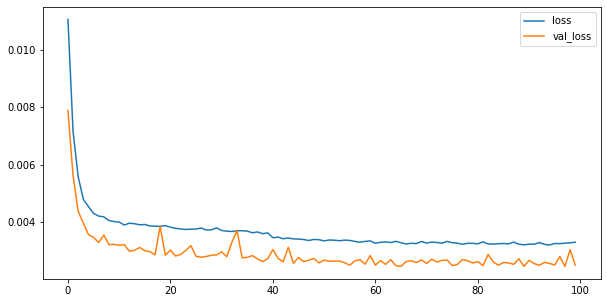

In [24]:
## plot loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_1.history['loss'], label='loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.legend()

In [29]:
model_2 = Sequential()
model_2.add(Dense(8, activation='relu', input_dim=x_train.shape[1]))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dropout(rate=0.25))
model_2.add(Dense(1))
model_2.summary()

model_2.compile(loss ='MeanAbsoluteError', optimizer ='adam',metrics=["MeanAbsoluteError"])

history_2 = model_2.fit(x=x_train, y=y_train, batch_size=25, epochs=100, validation_data=(x_valid, y_valid), shuffle=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 224       
                                                                 
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1282/1282 [==============================] -

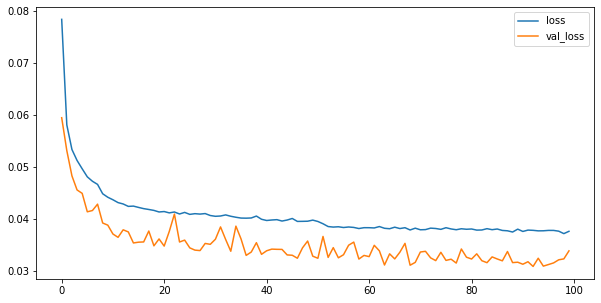

In [30]:
## plot loss
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.legend()

## preprocess test dataset

In [ ]:
numeric_test = df_test.select_dtypes(include=[np.number])
categorical_test = df_test.select_dtypes(exclude=[np.number])
categorical_test.head()

In [ ]:
categorical_test = categorical_test.astype('category')

for index in categorical_test.columns:
  categorical_test[index] = categorical_test[index].cat.codes
categorical_test.head()

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus
0,5,2,125,5,3,0,0,0,2,1
1,5,0,125,6,3,0,0,0,2,0
2,5,0,125,6,3,0,0,0,2,0
3,5,0,125,6,3,0,0,0,2,0
4,5,0,125,6,3,0,0,0,2,0


In [ ]:
# copy the data
categorical_test_scaled = categorical_test.copy()
numeric_test_scaled = numeric_test.copy()

# apply normalization techniques
for column in categorical_test_scaled.columns:
      categorical_test_scaled[column] = (categorical_test_scaled[column] - categorical_test_scaled[column].min()) / (categorical_test_scaled[column].max() - categorical_test_scaled[column].min())    
  
# apply normalization techniques
for column in numeric_test_scaled.columns:
      numeric_test_scaled[column] = (numeric_test_scaled[column] - numeric_test_scaled[column].min()) / (numeric_test_scaled[column].max() - numeric_test_scaled[column].min())    
  

In [ ]:
new_test = categorical_test_scaled
scaled_test = new_test.add(numeric_test_scaled, fill_value=0)

In [ ]:
# seperate targets
y_test = scaled_test["ADR"]
x_test = scaled_test.loc[:, scaled_test.columns != 'ADR']

x_test, y_test = x_test.to_numpy() , y_test.to_numpy()

## predict test

In [ ]:
y_pred  = model.predict(x_test)

In [ ]:
my_array = np.column_stack((y_pred[:,0],y_test))
df = pd.DataFrame(my_array, columns = ['Y_prediction','Y_test'])
df.to_csv("/content/Results.csv")

In [ ]:
test_loss , test_MSE = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test loss: {test_MSE}")

2480/2480 [==============================] - 4s 1ms/step - loss: nan - mean_squared_error: nan
Test loss: nan
Test loss: nan


## feature selection

In [ ]:
train_features = train.header
train_labels = ["ADR"]
test_features = train_features
test_labels = train_labels
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=15,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

filtered_features= train_features.columns[list(features.k_feature_idx_)]

clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))